In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from scipy.stats import linregress

In [2]:
# Define global variables
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}
suptitle_param = dict(color='darkblue', fontsize=14)
SEED = 17

In [3]:
# Read data
brfss = pd.read_hdf(r'datasets/brfss.hdf5')
print(brfss.shape)
brfss.head()

(100000, 9)


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [4]:
# Read data
gss = pd.read_hdf(r'datasets/gss.hdf5')
print(gss.shape)
gss.head()

(62466, 10)


,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


# 4. Multivariate Thinking

Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

# <font color=darkred>4.1 Limits of simple regression</font>

1. Limits of simple regression
>In this chapter we'll get farther into regression, including multiple regression and one of my all-time favorite tools, logistic regression. But first let's understand the limits of simple regression.

2. Income and vegetables
>In a previous exercise, you made a scatter plot of vegetable consumption as a function of income, and plotted a line of best fit. Here's what it looks like (note that this version includes more data than you had for the exercise). The slope of the line is 0 point 07, which means that the difference between the lowest and highest income brackets is about 0 point 49 servings per day. So that's not a very big difference.

3. Vegetables and income
>But it was an arbitrary choice to plot vegetables as a function of income. We could have plotted it the other way around, like this. The slope of this line is 0 point 23, which means that the difference between 0 and 8 servings per day is about 2 income codes, roughly from code 5 to code 7. If we check the codebook, income code 5 is about \$30,000 per year; income code 7 is about \$65,000. So if we use vegetable consumption to predict income, we see a big difference. But when we used income to predict vegetable consumption, we saw a small difference. This example shows that regression is not symmetric; the regression of A onto B is not the same as the regression of B onto A.

4. Regression is not symmetric
>We can see that more clearly by putting the two figures side by side and plotting both regression lines on both figures. They are different because they are based on different assumptions. On the left, we treat income as a known quantity and vegetable consumption as random. On the right, vegetable consumption is known and income is random. When you run a regression model, you make decisions about how to treat the data, and those decisions affect the result you get.

5. Regression is not causation
>This example is meant to demonstrate another point, which is that regression doesn't tell you much about causation. If you think people with lower income can't afford vegetables, you might look at the figure on the left and conclude that it doesn't make much difference. If you think better diet increases income, the figure on the right might make you think it does. But in general, regression can't tell you what causes what. In this example, A might cause B, or B might cause A, or there might be other factors that cause both A and B. Regression alone can't tell you which way it goes.

6. Multiple regression
>However, we have tools for teasing apart relationships among multiple variables; one of the most important is multiple regression. SciPy doesn't do multiple regression, so we have to switch to a new library, StatsModels. Here's the import statement. And here's how we use it. `ols` stands for "ordinary least squares", another name for regression. The first argument is a formula string that specifies that we want to regress income as a function of vegetable consumption. The second argument is the BRFSS DataFrame. The names in the formula correspond to columns in the DataFrame. The result from ols() represents the model; we have to run dot fit() to get the results. The results object contains a lot of information, but the first thing we'll look at is params, which contains the estimated slope and intercept. And we get the same results we got from SciPy, so that's good!

7. Let's practice!
>In the next lesson we'll move on to multiple regression. But first, let's practice simple regression with statsmodels.

## REGRESSION IS NOT SYMMETRIC
## REGRESION DOES NOT SAY ANYTHING ABOUT CAUSATION

## <font color=blue>Vegetable consumption (y) as a function of Income (x)</font>

Vegetable consumption (y) as a function of Income (x):
LinregressResult(slope=0.0698804809210502, intercept=1.5287786243363106, rvalue=0.11967005884864103, pvalue=1.3785039162482424e-238, stderr=0.0021109763563323335, intercept_stderr=0.013196467544093609)


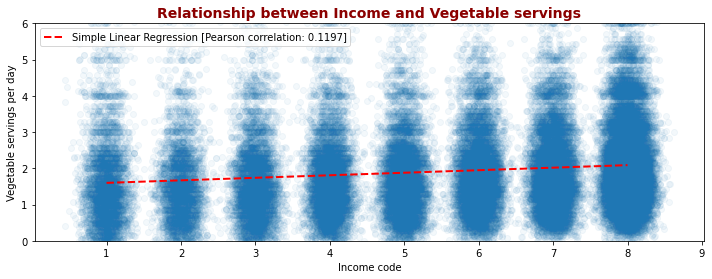

In [5]:
# Extract the variables
columns = ['INCOME2', '_VEGESU1']
subset = brfss.dropna(subset=columns)[columns]
xs_income = subset['INCOME2']
ys_income = subset['_VEGESU1']

# Compute the linear regression
res_income = linregress(xs_income, ys_income)
print('Vegetable consumption (y) as a function of Income (x):\n{}'.format(res_income))

fx_income = np.array([xs_income.min(), xs_income.max()])
fy_income = res_income.intercept + res_income.slope * fx_income

# Plot the scatter plot
fig = plt.figure(figsize=(12,4))
xs_jitter_income = xs_income + np.random.normal(0, 0.15, len(xs_income))
plt.plot(xs_jitter_income, ys_income, 'o', alpha=0.05)

# Plot the line of best fit
plt.plot(fx_income, fy_income, 'r--', lw=2, 
         label='Simple Linear Regression [Pearson correlation: {:.4f}]'.format(res_income.rvalue))


plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.title("Relationship between Income and Vegetable servings", **title_param)
plt.legend()
plt.show()

## <font color=blue>Income (y) as a function of Vegetable consumption (x)</font>

Income (y) as a function of Vegetable consumption (x):
LinregressResult(slope=0.2049345224314747, intercept=5.450700189148757, rvalue=0.11967005884864103, pvalue=1.3785039162482424e-238, stderr=0.006190740615220708, intercept_stderr=0.014410966163933074)


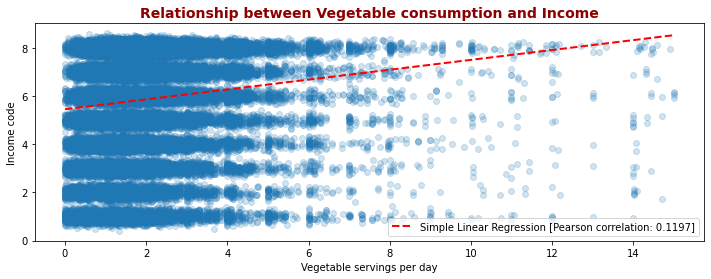

In [6]:
# Extract the variables
columns = ['INCOME2', '_VEGESU1']
subset = brfss.dropna(subset=columns)[columns]
ys_vegetable = subset['INCOME2']
xs_vegetable = subset['_VEGESU1']

# Compute the linear regression
res_vegetable = linregress(xs_vegetable, ys_vegetable)
print('Income (y) as a function of Vegetable consumption (x):\n{}'.format(res_vegetable))

fx_vegetable = np.array([xs_vegetable.min(), xs_vegetable.max()])
fy_vegetable = res_vegetable.intercept + res_vegetable.slope * fx_vegetable

# Plot the scatter plot
fig = plt.figure(figsize=(12,4))
ys_jitter_vegetable = ys_vegetable + np.random.normal(0, 0.15, len(ys_vegetable))
plt.plot(xs_vegetable, ys_jitter_vegetable, 'o', alpha=0.2)

# Plot the line of best fit
plt.plot(fx_vegetable, fy_vegetable, 'r--', lw=2, 
         label='Simple Linear Regression [Pearson correlation: {:.4f}]'.format(res_vegetable.rvalue))


plt.ylabel('Income code')
plt.xlabel('Vegetable servings per day')
#plt.xlim([0, 8])
plt.title("Relationship between Vegetable consumption and Income", **title_param)
plt.legend()
plt.show()

## <font color=blue>Comparing both situation</font>

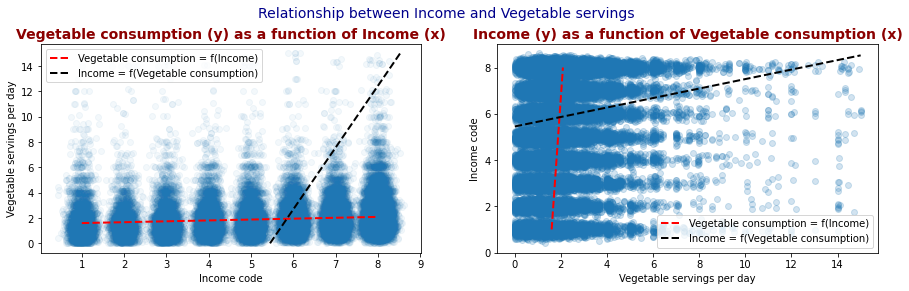

In [7]:
fig, axis = plt.subplots(1, 2, figsize=(15,4))


# Vegetable consumption (y) as a function of Income (x)
ax = axis[0]
ax.plot(xs_jitter_income, ys_income, 'o', alpha=0.05)
ax.plot(fx_income, fy_income, 'r--', lw=2, 
        label='Vegetable consumption = f(Income)')
ax.plot(fy_vegetable, fx_vegetable, 'k--', lw=2, 
         label='Income = f(Vegetable consumption)')

ax.set_xlabel('Income code')
ax.set_ylabel('Vegetable servings per day')
ax.set_title("Vegetable consumption (y) as a function of Income (x)", **title_param)
ax.legend()


# Income (y) as a function of Vegetable consumption (x)
ax = axis[1]
ax.plot(xs_vegetable, ys_jitter_vegetable, 'o', alpha=0.2)

# Plot the line of best fit
ax.plot(fy_income, fx_income, 'r--', lw=2, 
        label='Vegetable consumption = f(Income)')
ax.plot(fx_vegetable, fy_vegetable, 'k--', lw=2, 
        label='Income = f(Vegetable consumption)')

ax.set_ylabel('Income code')
ax.set_xlabel('Vegetable servings per day')
ax.set_title("Income (y) as a function of Vegetable consumption (x)", **title_param)
ax.legend()


plt.suptitle('Relationship between Income and Vegetable servings', **suptitle_param)
plt.subplots_adjust(left=None, right=None, bottom=None, top=.85, hspace=None, wspace=None)
plt.show()

## OLS STANDS FOR ORDINARY LEAST SQUARES (==REGRESSION)

First argument: is a formula string that specifies that we want to regress income (y) as a function of vegetable consumption (x).

In [8]:
# Income (y) as a function of Vegetable consumption (x)
results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
display(results.params)

# Compute the linear regression
linregress(subset['_VEGESU1'], subset['INCOME2'])

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

LinregressResult(slope=0.2049345224314747, intercept=5.450700189148757, rvalue=0.11967005884864103, pvalue=1.3785039162482424e-238, stderr=0.006190740615220708, intercept_stderr=0.014410966163933074)

# <font color=darkred>4.2 Regression and causation</font>

**Instructions**

In the BRFSS dataset, there is a strong relationship between vegetable consumption and income. The income of people who eat 8 servings of vegetables per day is double the income of people who eat none, on average.

Which of the following conclusions can we draw from this data?

    - (A) Eating a good diet leads to better health and higher income.
    - (B) People with higher income can afford a better diet. 
    - (C) People with high income are more likely to be vegetarians.

**Possible Answers**
- A only.
- B only.<font color=gray>Incorrect. We don't really know that higher income causes people to eat better; it could be that other factors influence both income and diet.</font>
- B and C.
- <font color=red>None of them.</font>

**Results**

<font color=darkgreen>That's right. This data is consistent with all of these conclusions, but it does not provide conclusive evidence for any of them.</font>

# <font color=darkred>4.3 Using StatsModels</font> 

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

**Instructions**
- Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress().
- Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols().

**Results**

<font color=darkgreen>Nice job. When you start working with a new library, checks like this help ensure that you are doing it right.</font>

In [9]:
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
display(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
display(results.params)

LinregressResult(slope=0.0698804809210502, intercept=1.5287786243363106, rvalue=0.11967005884864103, pvalue=1.3785039162482424e-238, stderr=0.0021109763563323335, intercept_stderr=0.013196467544093609)

Intercept    1.528779
INCOME2      0.069880
dtype: float64

# <font color=darkred>4.4 Multiple regression</font>

1. Multiple regression
>Now that we are using StatsModels, getting from simple to multiple regression is easy. As an example, we'll use data from the General Social Survey, which we saw in Chapter 2, and we'll explore variables that are related to income.

2. Income and education
>First, we load the GSS data. Then we run a regression of real income as a function of years of education. The first argument of ols() is a formula that specifies the variables in the regression. On the left, realinc is the variable we are trying to predict; on the right, educ is the variable we are using to inform the predictions. And here are the results. The estimated slope is 3586, which means that each additional year of education is associated with an increase of almost \$3600 of income. But income also depends on age, so it would be good to include that in the model, too.

3. Adding age
>Here's how. On the right side of the formula, you can list as many variables as you like, in this case, we have educ and age. The plus sign indicates that we expect the contributions of the two variables to be additive, which is a common assumption for models like this. Here are the results. The estimated slope for education is 3655, a little more than in the previous model. The estimated slope for age is only about \$80 per year, which is surprisingly small.

4. Income and age
>To see what's going on, let's look more closely at the relationship between income and age. I'll use groupby(), which is a Pandas feature we haven't seen before, to divide the DataFrame into age groups. The result is a GroupBy object that contains one group for each value of age. The GroupBy object behaves like a DataFrame in many ways. You can use brackets to select a column, like realinc in this example, and then invoke a method like mean(). The result is a Pandas series that contains the mean income for each age group, which we can plot like this.

5. Mean income over age
>Here's the result. Average income increases from age 20 to age 50, then starts to fall. And that explains why the estimated slope is so small, because the relationship is non-linear. Remember that correlation and simple regression can't measure non-linear relationships. But multiple regression can!

6. Adding a quadratic term
>**To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other variables**. As an example, I'll create a new variable called age2 that equals age squared. Now we can run a regression with both age and age2 on the right side. And here are the results. The slope associated with age is substantial, about \$1700 per year. The slope associated with age2 is about -17, which is harder to interpret.

7. Whew!
>In the next lesson, we'll see methods to visualize regression results. But first, let's practice multiple regression.

## RELATION BETWEEN EDUCATION AND INCOME

In [10]:
# Income and education
results = smf.ols('realinc ~ educ', data=gss).fit()
results.params # Means that for each segment in educ, the income is incremented by $3,586.5 aprox.

Intercept   -11539.147837
educ          3586.523659
dtype: float64

## INCOME AS A FUNCTION OF EDUCATION AND AGE
## NOT CLEAR RELATION BETWEEN AGE AND INCOME IN THIS CASE

In [11]:
# Adding age
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params #The relation of income with age is not clear/consistent.

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

## UNDERSTANDING RELATIONSHIP BETWEEN AGE AND INCOME

age
18.0    36696.140255
19.0    33456.860419
20.0    26806.371609
21.0    27161.578191
22.0    27965.731410
            ...     
85.0    20792.064012
86.0    22539.024754
87.0    18200.485317
88.0    20555.524660
89.0    14068.617666
Name: realinc, Length: 72, dtype: float64

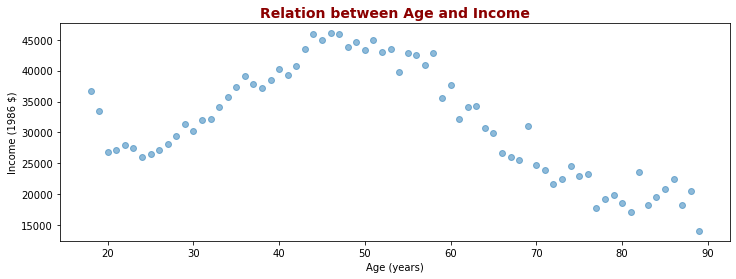

In [12]:
# Income and age
grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()
display(grouped['realinc'].mean())

fig = plt.figure(figsize=(12,4))
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.title('Relation between Age and Income', **title_param)
plt.show()

## RESOLVING THE UNDERSTANDING IN THE MULTIVARIABLE CASE

In [13]:
# Adding a quadratic term
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params #Much better

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

# <font color=darkred>4.5 Plot income and education</font> 

To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

**Instructions**
- Group gss by 'educ'. Store the result in grouped.
- From grouped, extract 'realinc' and compute the mean.
- Plot mean_income_by_educ as a scatter plot. Specify 'o' and alpha=0.5.

**Results**

<font color=darkgreen>Well done. It looks like the relationship between income and education is non-linear.</font>

Intercept   -11539.147837
educ          3586.523659
dtype: float64

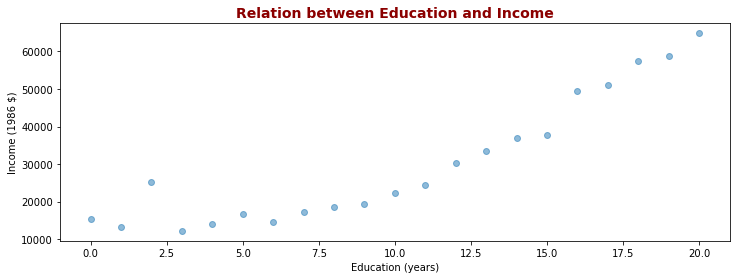

In [14]:
display(smf.ols('realinc ~ educ', data=gss).fit().params)

# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped.realinc.mean()

# Plot mean income as a scatter plot
fig = plt.figure(figsize=(12,4))
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.title('Relation between Education and Income', **title_param)
plt.show()

# <font color=darkred>4.6 Non-linear model of education</font> 

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

**Instructions**
- Add a column named 'educ2' to the gss DataFrame; it should contain the values from 'educ' squared.
- Run a regression model that uses 'educ', 'educ2', 'age', and 'age2' to predict 'realinc'.

**Results**

<font color=darkgreen>Excellent. The slope associated with educ2 is positive, so the model curves upward.</font>

In [15]:
# Add a new column with educ squared
gss['educ2'] = gss.educ**2

# Run a regression model with educ, educ2, age, and age2
display(smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit().params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

# <font color=darkred>4.7 Visualizing regression results</font>

1. Visualizing regression results
>In the previous lesson we ran a multiple regression model to characterize the relationship between income and age. Because the model is non-linear, the parameters are hard to interpret. In this lesson we'll see a way to interpret them visually, and to validate them against data.

2. Modeling income and age
>Here's the model from the previous exercise. First, we created new variables for educ squared and age squared. Then we ran the regression model with educ, educ2, age, and age2. And here are the results. The parameters are hard to interpret. Fortunately, we don't have to -- sometimes the best way to understand a model is by looking at its predictions rather than its parameters.

3. Generating predictions
>The regression results object provides a method called predict() that uses the model to generate predictions. It takes a DataFrame as a parameter and returns a Series with a prediction for each row in the DataFrame. To use it, I'll create a new DataFrame with age running from 18 to 85, and age2 set to age squared. Next, I'll pick a level for educ, like 12 years, which is the most common value. When you assign a single value to a column in a DataFrame, Pandas makes a copy for each respondent. Then we can use results to predict the average income for each age group, holding education constant.

4. Plotting predictions
>The result from predict() is a Series with one prediction for each row. So we can plot it like this, with age on the x-axis and the predicted income for each age group on the y-axis. We can plot the data for comparison, like this; recall that we computed mean_income_by_age in the previous lesson. And we should label the axes, as always.

5. Comparing with data
>Here are the results. The blue dots show the average income in each age group. The orange line shows the predictions generated by the model, holding education constant. This plot shows the shape of the model, a downward-facing parabola.

6. Levels of education
>We can do the same thing with other levels of education, like 14 years, which is the nominal time to earn an Associate's degree, and 16 years, which is the nominal time to earn a Bachelor's degree.

7. Interpreting the results
>And here are the results. The lines show mean income, as predicted by the model, as a function of age, for three levels of education. This visualization helps validate the model since we can compare the predictions with the data. And it helps us interpret the model since we can see the separate contributions of age and education.

8. Let's practice!
>In the exercises, you'll have a chance to run a multiple regression, generate predictions, and visualize the results. Have fun!

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

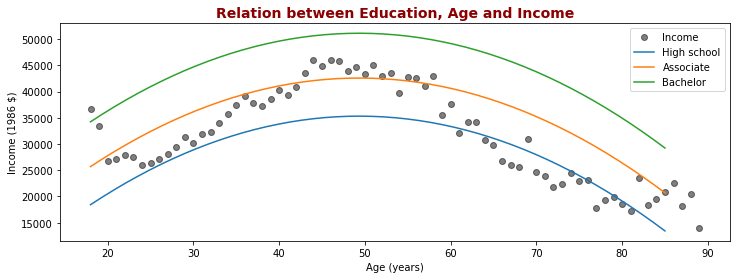

In [16]:
# Group by educ - Compute mean income in each group
mean_income_by_educ = gss.groupby('educ').realinc.mean()

results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()
display(results.params)


# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

study_level = {12: 'High school',
               14: 'Associate',
               16: 'Bachelor',
               #18: 'Master',
               #20: 'PhD'
              }

for educ in study_level: # years education
    df['educ'], df['educ2'] = educ, educ**2
    df[study_level[educ]] = results.predict(df[['age', 'age2', 'educ', 'educ2']])

    
# Plotting predictions
fig = plt.figure(figsize=(12,4))
ax = fig.gca()
plt.plot(mean_income_by_age, 'ko', alpha=0.5, label='Income')
df.drop(['age2', 'educ', 'educ2'], axis = 1).set_index('age').plot(ax=ax)

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.title('Relation between Education, Age and Income', **title_param)
plt.legend()
plt.show()

# <font color=darkred>4.8 Making predictions</font> 

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

**Instructions**
- Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
- Add a variable named 'age' with the constant value 30.
- Use df to generate predicted income as a function of education.

**Results**

<font color=darkgreen>Nice job. Now let's see what the results look like.</font>

In [17]:
# Group by educ - Compute mean income in each group
mean_income_by_educ = gss.groupby('educ').realinc.mean()

results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()
display(results.params)


# Generating predictions
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['educ2'] = df['educ']**2

yearsold = {20: '20 years',
            30: '30 years',
            40: '40 years',
            50: '50 years',
            60: '60 years'}

for age in yearsold: 
    df['age'], df['age2'] = age, age**2
    df[yearsold[age]] = results.predict(df[['age', 'age2', 'educ', 'educ2']])

df.head()

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

,educ,educ2,age,age2,20 years,30 years,40 years,50 years,60 years
0,0.000000,0.000000,60,3600,3813.665408,12182.344976,17111.627774,18601.513804,16652.003064
1,0.408163,0.166597,60,3600,3624.678950,11993.358518,16922.641316,18412.527346,16463.016606
2,0.816327,0.666389,60,3600,3488.992531,11857.672098,16786.954897,18276.840926,16327.330187
3,1.224490,1.499375,60,3600,3406.606149,11775.285717,16704.568515,18194.454545,16244.943805
4,1.632653,2.665556,60,3600,3377.519806,11746.199374,16675.482172,18165.368202,16215.857462


# <font color=darkred>4.9 Visualizing predictions</font> 

Now let's visualize the results from the previous exercise!

**Instructions**
- Plot mean_income_by_educ using circles ('o'). Specify an alpha of 0.5.
- Plot the prediction results with a line, with df['educ'] on the x-axis and pred on the y-axis.

**Results**

<font color=darkgreen>Looks like this model captures the relationship pretty well. Nice job.</font>

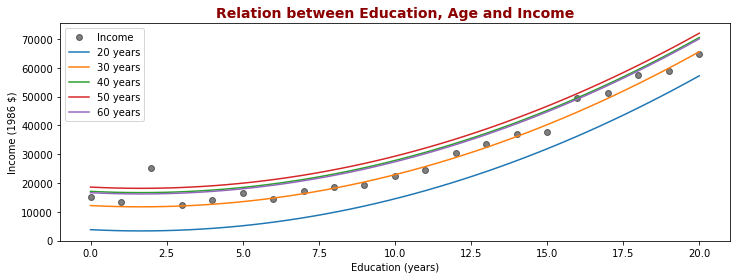

In [18]:
# Plotting predictions
fig = plt.figure(figsize=(12,4))
ax = fig.gca()
plt.plot(mean_income_by_educ, 'ko', alpha=0.5, label='Income')
df.drop(['age', 'age2', 'educ2'], axis = 1).set_index('educ').plot(ax=ax)

plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.title('Relation between Education, Age and Income', **title_param)
plt.legend()
plt.show()

# <font color=darkred>4.10 Logistic regression</font>

1. Logistic regression
>Congratulations on making it this far! I have saved one of my favorite topics for the end - logistic regression.

2. Categorical variables
>To understand logistic regression, we have to start with categorical variables. Most of the variables we have used so far - like income, age, and education - are numerical. But variables like sex and race are categorical; that is, each respondent belongs to one of a specified set of categories.

3. Sex and income
>With StatsModels, it is easy to include a categorical variable as part of a regression model. Here's how. In the formula string, the letter C indicates that sex is a categorical variable. And here are the results. The regression treats the value sex=1, which is male, as the default, and reports the difference associated with the value sex=2, which is female. So this result indicates that income for women is about \$4100 less than for men, after controlling for age and education.

4. Boolean variable
>If a categorical variable has only two values, it's called a boolean variable. For example, one of the questions in the General Social Survey asks "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?" The variable is called gunlaw, and here are the values. 1 means yes and 2 means no, so most respondents are in favor. To explore the relationship between this variable and factors like age, sex, and education, we can use logistic regression. StatsModels provides logistic regression, but to use it, we have to recode the variable so 1 means yes and 0 means no. We can do that by replacing 2 with 0. And we can check the results.

5. Logistic regression
>Now we can run the regression. Instead of ols(), we use logit(), which is named for the logit function, which is related to logistic regression. Other than that, everything is the same as what we have seen before. And here are the results. The parameters are in the form of "log odds", which you may or may not be familiar with. I won't explain them in detail here, except to say that positive values are associated with things that make the outcome more likely; negative values make the outcome less likely. For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form of gun control. To see how much more likely, we can generate and plot predictions, as we did with linear regression.

6. Generating predictions
>As an example, I'll generate predictions for different ages and sexes, with education held constant. First we need a DataFrame with age and educ. Then we can compute age2 and educ2. We can generate predictions for men like this. And for women like this.

7. Visualizing results
>Now, to visualize the results, I start by plotting the data. As we've done before, we'll divide the respondents into age groups and compute the mean in each group. The mean of a binary variable is the fraction of people in favor. Now we can plot the predictions, for men and women, as a function of age. And label the axes.

8. Gun laws and age
>Here's what it looks like. According to the model, people near age 50 are least likely to support gun control (at least as this question was posed). And women are more likely to support it than men, by almost 15 percentage points.

9. Let's practice!
>Logistic regression is a powerful tool for exploring relationships between a binary variable and the factors that predict it. In the exercises, you'll explore the factors that predict support for legalizing marijuana.

In [19]:
# Sex and income
print('Sex', gss.sex.unique()) #Acording to codebook, 1=Male, 2=Femañe

formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)' #C() identify the field as categorical.
results = smf.ols(formula, data=gss).fit()
results.params
# This result indicates that income for women is about $4,100 less than for men, after controlling for age and education.

Sex [1 2]


Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

In [20]:
# Working with boolean variables
# If a categorical variable has only two values, it's called a boolean variable. 
# For example, one of the questions in the General Social Survey asks 
# "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?" 
display(gss['gunlaw'].value_counts()) #1 means yes, 2 means No

# To use logistic regression, we have to recode the variable so 1 means yes and 0 means No
gss['gunlaw_bool'] = gss['gunlaw'].replace([2], [0])
gss['gunlaw_bool'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

1.0    30918
0.0     9632
Name: gunlaw_bool, dtype: int64

In [21]:
# Logistic regression
formula = 'gunlaw_bool ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

In [22]:
# Logistic regression
display(gss.head())

# The mean of a binary variable is the fraction of people in favor.
display(gss.groupby('age')['gunlaw_bool'].mean().head()) 

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,age2,educ2,gunlaw_bool
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893,676.0,324.0,0.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,1444.0,144.0,1.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,3249.0,144.0,1.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,3721.0,196.0,1.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893,3481.0,144.0,0.0


age
18.0    0.780269
19.0    0.755125
20.0    0.741162
21.0    0.755744
22.0    0.732789
Name: gunlaw_bool, dtype: float64

In [23]:
# Instead of ols(), we use logit(), which is named for the logit function, which is related to logistic regression. 
# And here are the results. The parameters are in the form of "log odds". Positive values are associated with things that 
# make the outcome more likely; negative values make the outcome less likely. 
# For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form 
# of gun control. 
formula = 'gunlaw_bool ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

,age,age2,educ,educ2,sex,Male,Female
0,18.00000,324.000000,12,144,2,0.698764,0.831832
1,19.44898,378.262807,12,144,2,0.695164,0.829434


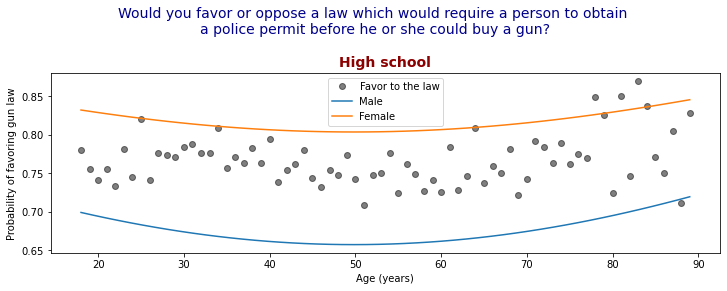

,age,age2,educ,educ2,sex,Male,Female
0,18.00000,324.000000,14,196,2,0.718823,0.844996
1,19.44898,378.262807,14,196,2,0.715365,0.842750


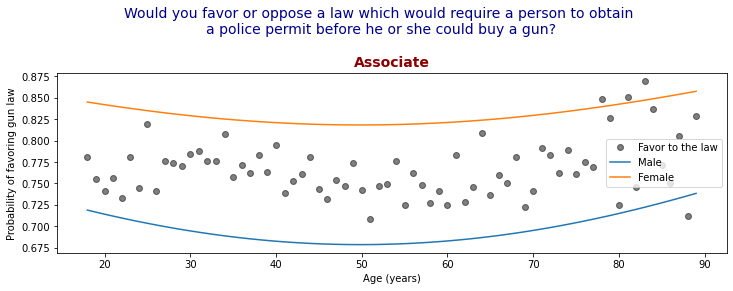

,age,age2,educ,educ2,sex,Male,Female
0,18.00000,324.000000,16,256,2,0.748206,0.863694
1,19.44898,378.262807,16,256,2,0.744980,0.861674


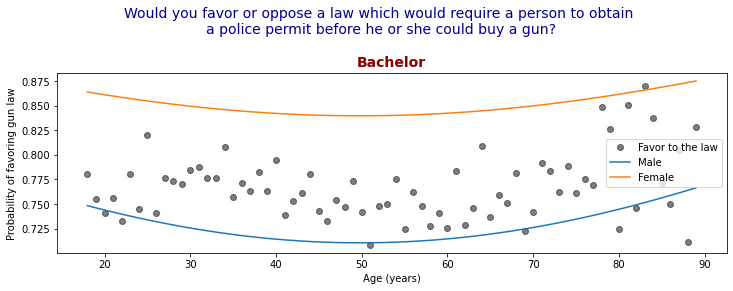

In [24]:
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw_bool'].mean()

# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

sex_values = {1:'Male', 2:'Female'}
study_level = {12: 'High school',
               14: 'Associate',
               16: 'Bachelor',
               #18: 'Master',
               #20: 'PhD'
              }
for educ in study_level: # years education
    df['educ'], df['educ2'] = educ, educ**2
    for sex in sex_values:
        df['sex'] = sex    
        df[sex_values[sex]] = results.predict(df[['age', 'age2', 'educ', 'educ2', 'sex']])
    display(df.head(2))
    
    # Plotting predictions
    # "Would you favor or oppose a law which would require a person to obtain a police permit 
    # before he or she could buy a gun?" 
    fig = plt.figure(figsize=(12,4))
    ax = fig.gca()
    plt.plot(favor_by_age, 'ko', alpha=0.5, label='Favor to the law') # Becouse 1 is yes, and 0 (before was 2) is no
    df[['age', 'Male', 'Female']].set_index('age').plot(ax=ax)
    plt.xlabel('Age (years)')
    plt.ylabel('Probability of favoring gun law')
    plt.title(study_level[educ], **title_param)
    plt.suptitle('Would you favor or oppose a law which would require a person to obtain \n'+\
                 'a police permit before he or she could buy a gun?', **suptitle_param)
    plt.legend()
    plt.subplots_adjust(left=None, right=None, bottom=None, top=.75, hspace=None, wspace=None)
    plt.show()

# <font color=darkred>4.11 Predicting a binary variable</font>

**Instructions**

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question **"Do you think the use of marijuana should be made legal or not?"**

**Results**
- Fill in the parameters of smf.logit() to predict grass using the variables age, age2, educ, and educ2, along with sex as a categorical variable.
- Add a column called educ and set it to 12 years; then compute a second column, educ2, which is the square of educ.
- Generate separate predictions for men and women.
- Fill in the missing code to compute the mean of 'grass' for each age group, and then the arguments of plt.plot() to plot pred2 versus df['age'] with the label 'Female'.

<font color=darkgreen>You made it! Congratulations on completing this course. I hope you enjoyed it and learned a lot. Should you wish to use the Pmf and Cdf classes from this course in your own work, you can download the empiricaldist library <a href='https://pypi.org/project/empiricaldist/'>here</a>.</font>

## STEP 1: EXPLORING DATA

In [25]:
display(gss['grass'].value_counts()) #1 means yes, 2 means No

# To use logistic regression, we have to recode the variable so 1 means yes and 0 means No
gss['grass_bool'] = gss['grass'].replace([2], [0])
gss['grass_bool'].value_counts()

2.0    25195
1.0    11027
Name: grass, dtype: int64

0.0    25195
1.0    11027
Name: grass_bool, dtype: int64

In [26]:
# Logistic regression
display(gss.head())

# The mean of a binary variable is the fraction of people in favor.
display(gss.groupby('age')['grass_bool'].mean().head()) 

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,age2,educ2,gunlaw_bool,grass_bool
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893,676.0,324.0,0.0,NaN
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,1444.0,144.0,1.0,NaN
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,3249.0,144.0,1.0,NaN
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,3721.0,196.0,1.0,NaN
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893,3481.0,144.0,0.0,NaN


age
18.0    0.295775
19.0    0.414865
20.0    0.423333
21.0    0.410541
22.0    0.441701
Name: grass_bool, dtype: float64

## STEP 2: BUILD THE MODEL TO PREDICT

In [27]:
# Logistic regression
formula = 'grass_bool ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params #Acording to codebook, 1=Male, 2=Femañe

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

## STEP 3: PREPARE THE SCENARIO FOR PREDICTIONS

## STEP 4: GENERATE SEPARATE PREDICTIONS FOR MEN AND WOMEN AND PLOT THEM.

,age,age2,educ,educ2,sex,Male,Female
0,18.00000,324.000000,12,144,2,0.453667,0.361127
1,19.44898,378.262807,12,144,2,0.443782,0.351959


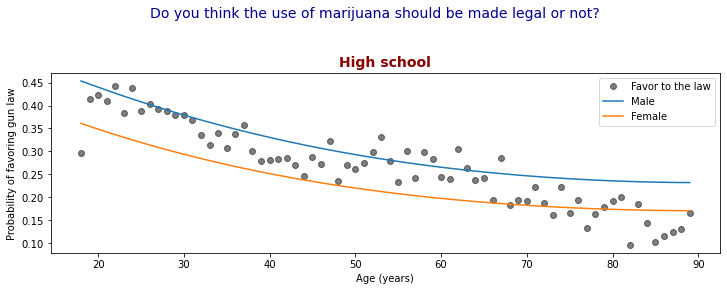

,age,age2,educ,educ2,sex,Male,Female
0,18.00000,324.000000,14,196,2,0.510345,0.415026
1,19.44898,378.262807,14,196,2,0.500356,0.405358


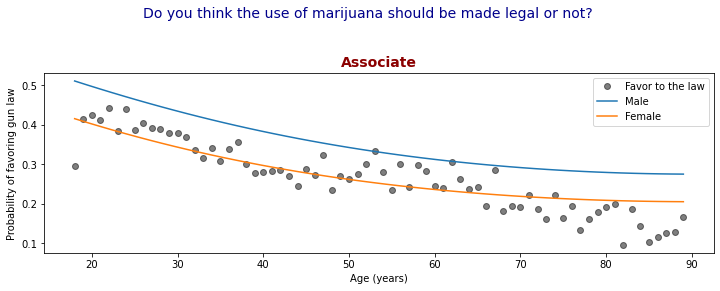

,age,age2,educ,educ2,sex,Male,Female
0,18.00000,324.000000,16,256,2,0.558563,0.462749
1,19.44898,378.262807,16,256,2,0.548688,0.452831


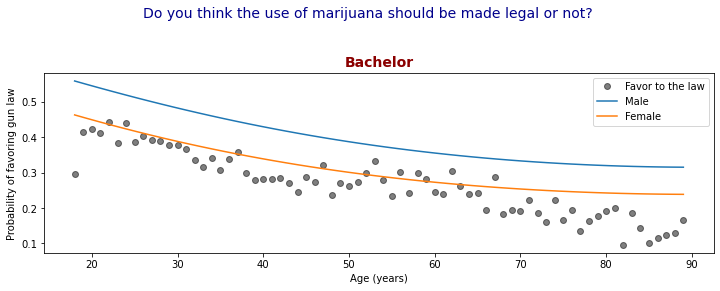

In [28]:
grouped = gss.groupby('age')
favor_by_age = grouped['grass_bool'].mean()

# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

sex_values = {1:'Male', 2:'Female'}
study_level = {12: 'High school',
               14: 'Associate',
               16: 'Bachelor',
               #18: 'Master',
               #20: 'PhD'
              }

for educ in study_level: # years education
    df['educ'], df['educ2'] = educ, educ**2
    for sex in sex_values:
        df['sex'] = sex    
        df[sex_values[sex]] = results.predict(df[['age', 'age2', 'educ', 'educ2', 'sex']])
    display(df.head(2))
    
    # Plotting predictions
    # "Would you favor or oppose a law which would require a person to obtain a police permit 
    # before he or she could buy a gun?" 
    fig = plt.figure(figsize=(12,4))
    ax = fig.gca()
    plt.plot(favor_by_age, 'ko', alpha=0.5, label='Favor to the law') # Becouse 1 is yes, and 0 (before was 2) is no
    df[['age', 'Male', 'Female']].set_index('age').plot(ax=ax)
    
    plt.xlabel('Age (years)')
    plt.ylabel('Probability of favoring gun law')
    plt.title(study_level[educ], **title_param)
    plt.suptitle('Do you think the use of marijuana should be made legal or not?', **suptitle_param)
    plt.legend()
    
    plt.subplots_adjust(left=None, right=None, bottom=None, top=.75, hspace=None, wspace=None)
    plt.show()

# <font color=darkred>4.12 Next steps</font> 

1. Next steps
>Congratulations on completing the course! We covered a lot of material. I hope you found it useful and interesting. At this point, I'd like to summarize the topics we covered, and make some connections that might clarify the big picture. And I'll suggest some resources you can explore next.

2. Exploratory Data Analysis
>The organizing theme of this course is exploratory data analysis, which is a process and a set of techniques for working with data, especially in the early stages of a project, or when you are working with a new data set. The four chapters in this course are the steps of this process: - Chapter 1 is about importing and cleaning the data, and checking for errors and other special conditions. This might not be the most exciting part of the process, but if you skip these steps, it can come back to haunt you. Time spent cleaning and validating data can save you from embarrassing, and sometimes expensive, errors. - Chapter 2 is about exploring variables one at a time, visualizing distributions using PMFs, CDFs, and KDE, and choosing appropriate summary statistics. - In Chapter 3 we explored relationships between variables two at a time, using scatter plots and other visualizations; and we quantified those relationships using correlation and simple regression. - Finally, in Chapter 4, we explored multivariate relationships using multiple regression and logistic regression.

3. Import, clean, and validate
>From Chapter 1, you might remember that we looked at the distribution of birth weights from the National Survey of Family Growth. If you only remember one thing, remember the 99 pound babies, and how much it can mess up your results if you don't validate the data.

4. Visualize distributions
>In Chapter 2 we looked at the distributions of age, income, and other variables from the General Social Survey.

5. CDF, PMF, and KDE
>I recommended using CDFs as the best way to explore distributions. But when you present to audiences that are not familiar with CDFs, you can use PMFs if there are a small number of unique values, and KDE if there are a lot.

6. Visualizing relationships
>In Chapter 3 we looked at heights and weights from the BRFSS, and developed several ways to visualize relationships between variables, including scatter plots, violin plots, and box plots like this one.

7. Quantifying correlation
>We used the coefficient of correlation to quantify the strength of a relationship. We also used simple regression to find the line of best fit, like the one here that shows weight as a function of height. But remember that both of these methods only capture linear relationships; if the relationship is non-linear, they can be misleading. Always look at a visualization, like this scatter plot, before computing correlation or simple regression.

8. Multiple regression
>In Chapter 4 we used multiple regression to add control variables and to describe non-linear relationships. For example, this plot shows the non-linear relationship between income and age, controlling for level of education.

9. Logistic regression
>And finally we used logistic regression to explain and predict binary variables. For example, this figure shows the relationship between support for gun control, as a function of age, for male and female respondents in the GSS.

10. Where to next?
>This course makes a great foundation for other DataCamp courses. Maybe you may want to learn more about CDFs, or data visualization, or pandas. DataCamp has courses that cover all of these topics and more, and I encourage you to check them out. On this slide are a few recommended next courses.

11. Think Stats
>And if you'd like to review the material from this course, and learn additional topics like time series analysis, you could read my book, called Think Stats. It's published by O'Reilly Media and also available under a free license at thinkstats2.com.

12. Thank you!
>Finally, I hope you found this course useful, and I hope you had some fun and learned a lot. Thank you!

# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/exploratory-data-analysis-in-python